In [ ]:
# Task description:
# import life-expectancy and fertility-rate data for multiple countries
# create an animated gif from plots across years 1960 to 2015

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import plotly.graph_objects as go
import plotly.express as px

In [4]:
# set figure size larger globally

plt.rcParams["figure.figsize"] = (10,5)

In [14]:
# import data

fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('gapminder_population.xlsx', index_col=0)
cont = pd.read_csv('continents.csv', sep = ';', index_col=0)
cont_ext = pd.read_excel('gapminder_geographies.xlsx', sheet_name=1, index_col=0)

### Draw Histogram with Matplotlib and Pandas

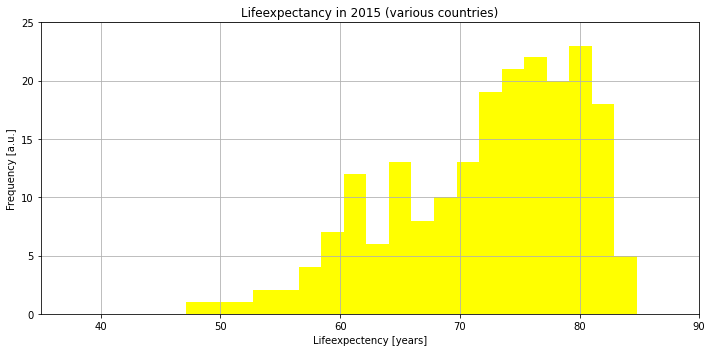

In [7]:
# draw histogramm
life[2015].hist(bins=20, facecolor='#ffff00', histtype='bar')
plt.title('Lifeexpectancy in 2015 (various countries)')
plt.xlabel('Lifeexpectency [years]')
plt.ylabel('Frequency [a.u.]')
plt.axis([35, 90.0, 0.0, 25.0])
plt.tight_layout()

# export figure as vector and pixel graphic
plt.savefig('histo.svg')
plt.savefig('histo.png', dpi=300)

### Data cleaning and formatting

In [15]:
# convert columns from str to int (years)
fert.columns = fert.columns.astype(int)
life.columns = life.columns.astype(int)
pop.columns = pop.columns.astype(int)

In [16]:
# set index name to 'country'
fert.index.name = 'country'
life.index.name = 'country'
pop.index.name = 'country'

# rename some columns for easier merge later
cont_ext.rename(columns={'name':'country', 'eight_regions':'continent'}, inplace=True)

In [17]:
# reset indices
fert = fert.reset_index()
life = life.reset_index()
pop = pop.reset_index()
cont = cont.reset_index()
cont_ext = cont_ext.reset_index()

In [18]:
fert.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.60,6.52,6.43,6.33,6.22,6.10,5.98,5.86,5.75,5.65
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08,2.06


In [19]:
# melt dataframes into long format for plotly express plots
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
life = life.melt(id_vars='country', var_name='year', value_name='life_exp')
pop = pop.melt(id_vars='country', var_name='year', value_name='population')

In [20]:
fert.head(10)

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,6.93
8,Anguilla,1800,NaN
9,Antigua and Barbuda,1800,5.00


In [21]:
# merge dataframes, add continent information
df = fert.merge(pop)
df = df.merge(life)
#df = pd.merge(df, cont, how='left', on='country')
df = pd.merge(df, cont_ext[['country', 'continent']], how='left', on='country')

# drop nan values
df.dropna(inplace=True)

In [22]:
# display excerpt of data for year 2000
df[df['year'] == 2000]

,country,year,fertility_rate,population,life_exp,continent
16836,Afghanistan,2000,7.73,19701940.0,50.1,asia_west
16838,Albania,2000,2.38,3121965.0,74.7,europe_east
16839,Algeria,2000,2.51,31183658.0,73.3,africa_north
16842,Angola,2000,6.84,15058638.0,52.3,africa_sub_saharan
16844,Antigua and Barbuda,2000,2.32,77648.0,73.8,america_north
...,...,...,...,...,...,...
17080,Venezuela,2000,2.82,24481477.0,73.8,america_south
17084,Vietnam,2000,1.98,80285563.0,72.0,east_asia_pacific
17088,Yemen,2000,6.36,17795219.0,62.4,asia_west
17090,Zambia,2000,6.07,10585220.0,44.8,africa_sub_saharan


### Single plot

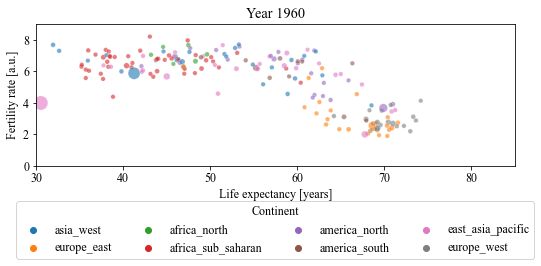

In [28]:
# make a single plot for one year

year = 1960
df_subset = df.loc[df['year'] == year]
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
g = sns.scatterplot(x='life_exp', y='fertility_rate', hue = 'continent', size = 'population', sizes=(20, 200), data=df_subset, alpha=0.6)
h, l = g.get_legend_handles_labels()
plt.axis([30, 85.0, 0.0, 9])
plt.legend(h[1:9],l[1:9], bbox_to_anchor=(0.5, -0.45), loc='center', ncol=4, title='Continent')
plt.title('Year ' + str(year))
plt.xlabel('Life expectancy [years]')
plt.ylabel('Fertility rate [a.u.]')
plt.tight_layout()
filename = 'animated_scatter_' + str(year) +'.png'
plt.savefig(filename, dpi=300, facecolor = 'w')

### Multiple plots and gif creation

In [32]:
# make multiple plots for 1960 through 2015 and store them in a list

images = []

for year in range(1960, 2015 + 1):
    df_subset = df.loc[df['year'] == year]
    plt.rcParams['figure.figsize'] = [8, 4.5]
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 12})
    g = sns.scatterplot(x='life_exp', y='fertility_rate', hue = 'continent', size = 'population', sizes=(20, 200), data=df_subset, alpha=0.6)
    h, l = g.get_legend_handles_labels()
    plt.axis([30, 85.0, 0.0, 9])
    plt.legend(h[1:9],l[1:9], bbox_to_anchor=(0.5, -0.45), loc='center', ncol=4, title='Continent')
    plt.title('Year ' + str(year))
    plt.xlabel('Life expectancy [years]')
    plt.ylabel('Fertility rate [a.u.]')
    plt.tight_layout()
    filename = './images/animated_scatter_' + str(year) +'.png'
    plt.savefig(filename, dpi=300, facecolor = 'w')
    images.append(imageio.imread(filename))
    plt.close()
    
# create gif from image list
imageio.mimsave('output.gif', images, fps=5)

### Minimum and maximum life expectancy per continent

In [33]:
# explore some of the features in more detail

df_bonus = life[life['year'] == 2015]
df_bonus = pd.merge(df_bonus, cont[['country', 'continent']], how='left', on='country')
df_bonus.dropna(inplace=True)

In [34]:
df_bonus[['continent', 'life_exp']].groupby(['continent']).min()

,life_exp
continent,
Africa,47.1
Asia,53.8
Australia and Oceania,60.9
Europe,71.0
North America,64.3
South America,66.8


In [35]:
df_bonus[['continent', 'life_exp']].groupby(['continent']).max()

,life_exp
continent,
Africa,77.6
Asia,83.2
Australia and Oceania,82.3
Europe,84.8
North America,81.7
South America,79.5


### Plotly Express: super easy interactive plotting

In [44]:
# using plotly.express the animated plot is done in just a few lines of code:

fig = px.scatter(df[(df['year'] >= 1960) & (df['year'] <= 2015)], x="life_exp", y="fertility_rate", 
            animation_frame="year", animation_group="country",
           size="population", color="continent", hover_name="country",
           log_x=False, size_max=30, range_x=[30,90], range_y=[0,9], width=900, height=450,
                labels={'fertility_rate':'Fertility rate [a.u.]', 'life_exp':'Life expectancy [years]'},
                title='Fertility rate vs. Life expectancy')
# fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()